<a href="https://colab.research.google.com/github/sunujoseph/CSCI4050ML/blob/master/Copy_of_CSCI_4050U_2019_10_7_linear%2C_polynomial_and_logistic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import numpy as np

In [ ]:
# generate some sample data to perform linear regression.

X = np.linspace(0, 1, 10)
Y = 3*X + 1 + np.sin(6*X)

In [ ]:
import matplotlib.pyplot as pl

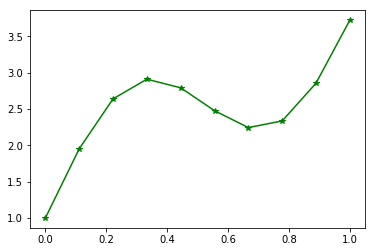

In [ ]:
pl.plot(X, Y, '-*', color='g');

In [ ]:
import tensorflow as tf

In [ ]:
def model(X, theta):
  # theta is a [...] of tensor variables.
  w, b = theta
  return w*X + b

In [ ]:
def loss(Y_true, Y_out):
  return tf.reduce_sum(tf.pow(Y_true - Y_out, 2))

In [ ]:
def optimize(model, loss, X, Y, theta, alpha=0.01):
  with tf.GradientTape() as tape:
    L = loss(Y, model(X, theta))
  
  grads = tape.gradient(L, theta)
  
  # update the variables in theta
  for var, grad in zip(theta, grads):
    var.assign_sub(alpha * grad)
  
  return loss(Y, model(X, theta))

In [ ]:
def train(model, loss, X, Y, theta, alpha=0.01, epochs=100):
  for i in range(epochs):
    L = optimize(model, loss, X, Y, theta)
    if i % (epochs // 10) == 0:
      print("[%d]: %.2f" % (i, L))
  return theta

In [ ]:
# Training

w = tf.Variable(-1.0, dtype=tf.float64) # arbitrary initial value used
b = tf.Variable(0.0, dtype=tf.float64)

train(model, loss, X, Y, [w, b])

[0]: 56.13
[10]: 3.47
[20]: 3.05
[30]: 2.85
[40]: 2.70
[50]: 2.60
[60]: 2.52
[70]: 2.47
[80]: 2.43
[90]: 2.40


[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.237868014184375>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.8829816715996537>]

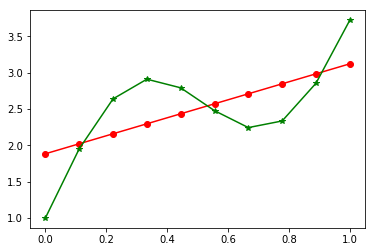

In [ ]:
pl.plot(X, model(X, [w, b]), '-o', color='red')
pl.plot(X, Y, '-*', color='green');

# Polynomial Model

Recall in the linear model case (implemented as `model(X, theta)`),
we assume:
$$ y = wx + b $$

Now, we make use of _power series_ of $x$.

$$ y = a_0 + a_1x + a_2 x^2 + \dots + a_k x^k $$

which can be written as:

$$ y = \sum_{i=0}^k a_i x^k $$ 

In [ ]:
def power_expansion(X, k):
  powers = np.zeros((len(X), k+1))
  for i in range(k+1):
    powers[:, i] = np.power(X, i)
    
  return powers

In [ ]:
power_expansion(np.array([1,2,3,4,5]), 3)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

## New model

The new model has *one* parameter - which is the tensor of
the coefficients $a_i$.

$$\theta = \mathrm{list}([a_0, a_1, \dots, a_k])$$

In [ ]:
def power_model(X, theta):
  a = theta[0]
  k = a.shape[0]-1
  return tf.squeeze(tf.matmul(power_expansion(X, k), a))

In [ ]:
# training the new model

k = 5
a = tf.Variable(np.random.randn(k+1, 1), dtype=tf.float64)
epochs = 10000
alpha = 0.01

train(power_model, loss, X, Y, [a], epochs=epochs);

[0]: 70.10
[1000]: 1.65
[2000]: 1.18
[3000]: 0.86
[4000]: 0.64
[5000]: 0.49
[6000]: 0.38
[7000]: 0.31
[8000]: 0.26
[9000]: 0.23


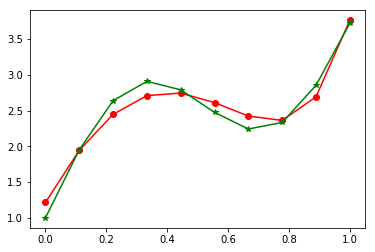

In [ ]:
pl.plot(X, power_model(X, [a]), '-o', color='red')
pl.plot(X, Y, '-*', color='green');

# Logistic Regression

## Generate the data

In [ ]:
N = 50

X1 = np.random.randn(N, 2) + np.array([-5, -4])
Y1 = np.zeros(N)

X2 = np.random.randn(N, 2) + np.array([2, -2])
Y2 = np.ones(N)

X = np.concatenate([X1, X2])
Y = np.concatenate([Y1, Y2])

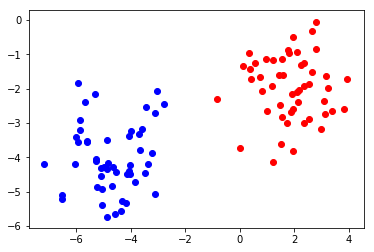

In [ ]:
pl.scatter(X[Y==0, 0], X[Y==0, 1], color='blue');
pl.scatter(X[Y==1, 0], X[Y==1, 1], color='red');

In [ ]:
def sep_model(X, theta):
  w, b = theta
  return tf.squeeze(tf.sigmoid(tf.matmul(X, w) + b))

In [ ]:
# loss function is binary_crossentropy

In [ ]:
w = tf.Variable(np.random.randn(2, 1), dtype=tf.float64)
b = tf.Variable(np.random.randn(), dtype=tf.float64)

In [ ]:
train(sep_model, tf.losses.binary_crossentropy, X, Y, [w, b])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[0]: 1.38
[10]: 0.75
[20]: 0.49
[30]: 0.37
[40]: 0.31
[50]: 0.27
[60]: 0.24
[70]: 0.22
[80]: 0.20
[90]: 0.19


[<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
 array([[ 0.61799869],
        [-0.05687687]])>,
 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.038596042347977325>]

## Visualize the classifier

In [ ]:
xx, yy = np.meshgrid(np.linspace(-10, 5, 100),
                    np.linspace(-10, 5, 100))

In [ ]:
z = np.zeros((100, 100))
for i in range(100):
  for j in range(100):
    x = xx[i][j]
    y = yy[i][j]
    z[i, j] = sep_model(np.array([[x, y]]), [w, b])

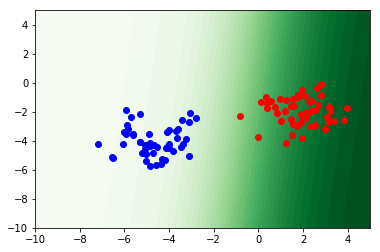

In [ ]:
pl.contourf(xx, yy, z, levels=40, cmap='Greens')
pl.scatter(X[Y==0, 0], X[Y==0, 1], color='blue');
pl.scatter(X[Y==1, 0], X[Y==1, 1], color='red');